In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import symbols, Eq, solve

In [12]:
# Define variables for f1 and f2
d = symbols('d')

# Distances (we are calculating the final propagation the total needs to be )
z1 = 2.0 - d  # m (distance to the first lens)
f1 = 800 * 1e-3  # m focal length focus mirror 
z2 = 0.5 + d # m (distance to the interaction point)

# Propagation matrices
M1 = np.array([[1, z1], [0, 1]])  # Propagation to the first lens
M2 = np.array([[1, z2], [0, 1]])  # Final propagation

# Thin lens matrices (symbolic for f1 and f2)
L2 = np.array([[1, 0], [-1/f1, 1]])  # Focusing lens

# Total matrix = M3 * L2 * M2 * L1 * M1
total_matrix = M2 @ L2 @ M1

# Extract matrix elements A, B, C, D
A, B, C, D = total_matrix[0, 0], total_matrix[0, 1], total_matrix[1, 0], total_matrix[1, 1]

# Starting parameters
starting_beam_width = 3.23 * 1e-3  # m
divergence_beam = 2.75 * 1e-3  # radians

startin_parameters = np.array([starting_beam_width, divergence_beam])

equation = Eq(total_matrix.dot(startin_parameters)[0], 0)
solutions = solve(equation, (d))

d_cal = solutions[0]
print(f"d = {d_cal} m")

d = 0.677019207218649 m


In [13]:
# Matrixes for plotting

def get_propagating_air(z_length: float) -> np.array:
    return np.array([[1, z_length], [0, 1]])

def get_lens_matrix(focal_length: float) -> np.array:
    return np.array([[1, 0], [-1/focal_length, 1]])

startin_parameters = np.array([starting_beam_width, divergence_beam])
focus_lens = get_lens_matrix(focal_length=f1)

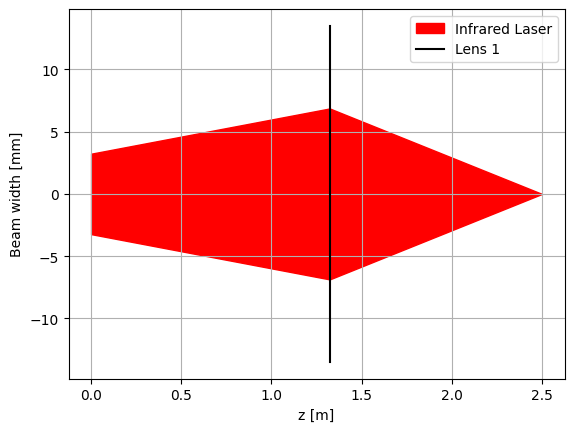

In [14]:
vector_focus = get_propagating_air(z1.subs({d: d_cal})).dot(startin_parameters)
interaction_point = get_propagating_air(z2.subs({d: d_cal})).dot(focus_lens.dot(vector_focus))


starting_z = 0
starting_y = starting_beam_width
i = 1

new_z1 = float(z1.subs({d: d_cal}))
new_z2 = float(z2.subs({d: d_cal}))


for x, y in zip(
    [new_z1, new_z2],
    [vector_focus, interaction_point]
):
    end_z = float(starting_z + x)
    end_y = float(y[0])
    
    xs = np.linspace(starting_z, end_z, 100)
    ys = np.linspace(starting_y, end_y, 100)
    
    plt.fill_between(x=xs, y1=ys * 1e3, y2=-ys * 1e3, color="Red", label="Infrared Laser" if i == 1 else None)
    
    i += 1
    starting_z = end_z
    starting_y = end_y

    
lens_radius = 0.0135 * 1e3 # m

plt.plot([new_z1, new_z1], [-lens_radius, lens_radius], color="black", label="Lens 1")

plt.ylabel('Beam width [mm]')
plt.legend()
plt.xlabel('z [m]')    
plt.grid()
plt.show()